In [1]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import scipy.misc
import imageio

In [2]:
# Get all nd2 files
nd2s = glob.glob("raw/*.nd2")
nd2s

['raw/18112019_SJR5_w1_5ms.nd2',
 'raw/18112019_SJR5_w2_30ms.nd2',
 'raw/18112019_SJR5_w3_30ms.nd2',
 'raw/18112019_SJR5_w5_30ms.nd2',
 'raw/18112019_SJR5_w4_30ms.nd2',
 'raw/18112019_SJR5_w2_5ms.nd2',
 'raw/18112019_SJR5_w3_5ms.nd2',
 'raw/18112019_SJR5_w1_30ms.nd2']

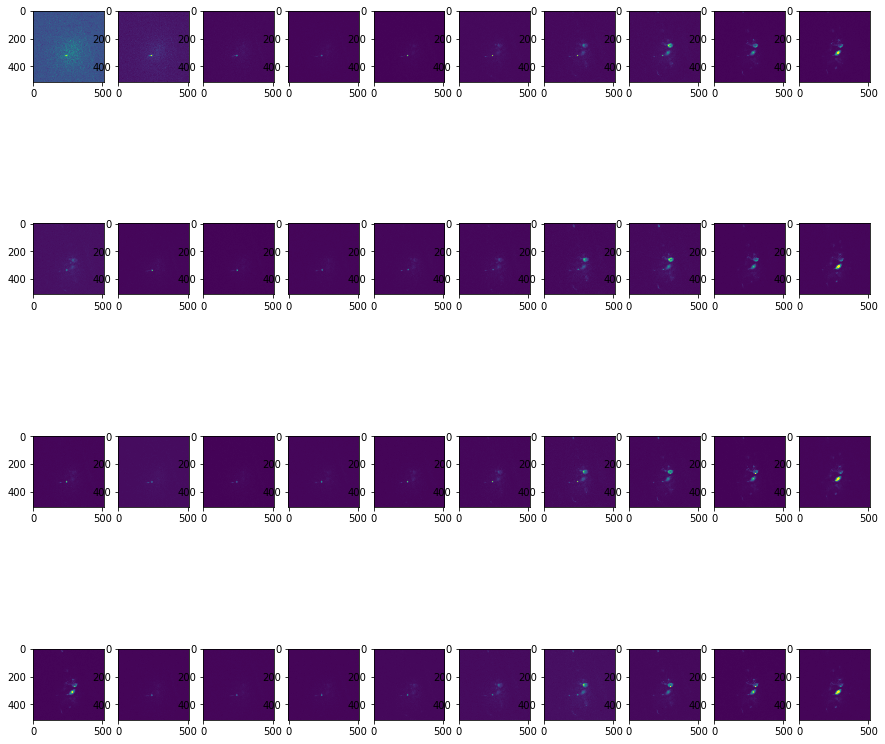

In [36]:
# Plot them
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 15))

img_index = 0
for nd2 in nd2s:
    with ND2Reader(nd2) as images:
        images.default_coords['c'] = 1
        images.bundle_axes = 'yxz'
        for volumeIndex in range(len(images)):
            crtImage = images[volumeIndex]
            slices = crtImage.shape[2]
            for sliceIndex in range(slices):
                if sliceIndex == 10:
                    break
                axes[img_index * 4 + volumeIndex, sliceIndex].imshow(crtImage[:,:,sliceIndex])
        break
    img_index += 1


In [18]:
# Convert nd2 to pngs
img_index = 0
for nd2 in nd2s:
    fileName = nd2.split('/')[-1].split('.nd2')[0]
    with ND2Reader(nd2) as images:
        for i in range(len(images)):
            name = "processed/" + fileName + "-" + str(i) + ".jpg"
            imageio.imwrite(name, images[i])
    img_index += 1
    

In [37]:
# Convert nd2 to pngs
for nd2 in nd2s:
    with ND2Reader(nd2) as images:
        fileName = nd2.split('/')[-1].split('.nd2')[0]
        images.default_coords['c'] = 1
        images.bundle_axes = 'yxz'
        for volumeIndex in range(len(images)):
            crtImage = images[volumeIndex]
            slices = crtImage.shape[2]
            for sliceIndex in range(slices):
                name = "processed/" + fileName + "-v" + str(volumeIndex) + "-s" + str(sliceIndex) + ".jpg"
                imageio.imwrite(name, crtImage[:,:,sliceIndex])
        break
    img_index += 1
    

#with ND2Reader("18112019_SJR5_w3_30ms.nd2") as images:
#     print(images.metadata)
#     print(images[1].shape)

     

Lossy conversion from float64 to uint8. Range [39.0, 315.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [63.0, 799.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [60.0, 2234.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [49.0, 4077.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [66.0, 4095.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [38.0, 2971.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [57.0, 2062.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [53.0, 2066.0]. Convert image to uint8 prior to saving to suppress 

In [ ]:
def prep_nd2_reader(reader, c=1):
    """
    Prepare the parameters of the ND2Reader object to be consistent with our data
    bundled_axes "yxz"
    default_cord for the channel of interest
    So looping over the reader goes stright through time
    """

    reader.default_coords['c'] = c
    reader.bundle_axes = 'yxz'